In [3]:
pip install shap


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import shap
import pandas as pd
import xgboost
import matplotlib.pyplot as plt

# Load cleaned data
df = pd.read_csv('C:/Users/ganes/OneDrive/Desktop/Individual  Projects/employee-attrition-prediction/Data/cleaned/cleaned_employee_data.csv')
X = df.drop('Attrition', axis=1)
y = df['Attrition']


In [5]:
model = xgboost.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X, y)


C:\Users\ganes\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:28:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [6]:
explainer = shap.Explainer(model)
shap_values = explainer(X)


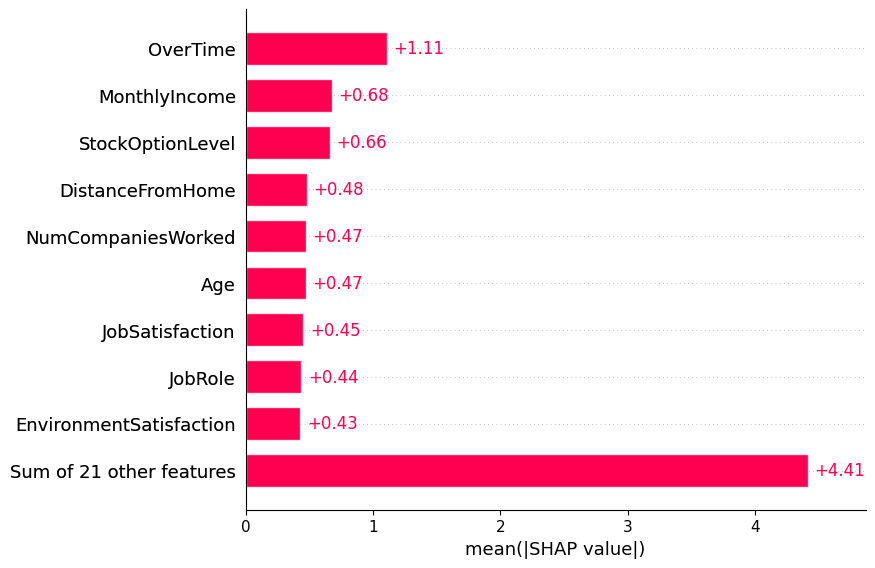

In [7]:
shap.plots.bar(shap_values, max_display=10)


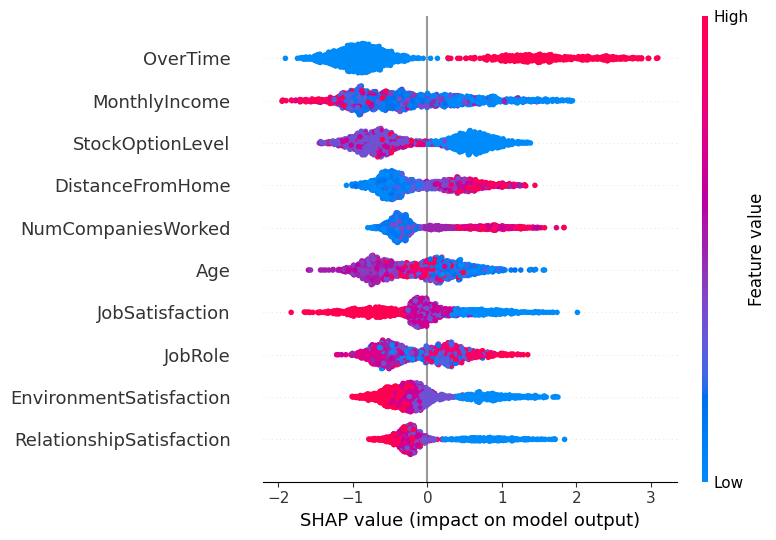

In [8]:
shap.summary_plot(shap_values, X, max_display=10)


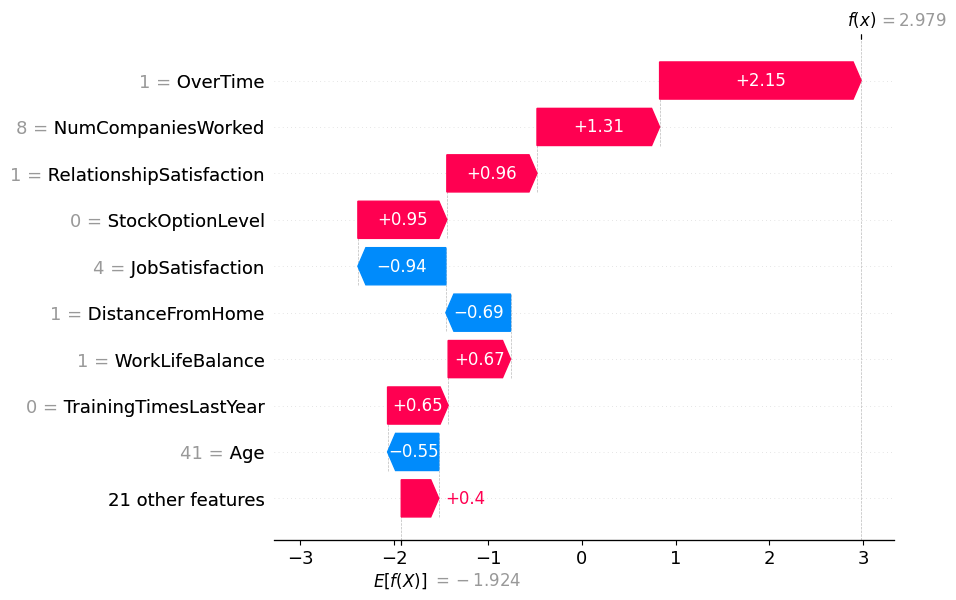

In [9]:
# Explain first row (employee)
shap.plots.waterfall(shap_values[0])
